# COMS 474 HW4
## Akhilesh Nevatia, akhilnev@iastate.edu

# NEURAL NETWORK

## Question 1

### (a) Neural Network for Alphanumeric Classification

1. **Input Dimensions (d)**:
   - The input to the neural network is a 32x32 RGB image. Since each pixel has 3 channels (Red, Green, and Blue), the total number of input features is calculated as:
   $d = 32 \times 32 \times 3 = 3,072$
   - This represents the flattened form of the image, where each pixel's RGB values are arranged in a single vector of size 3,072.

2. **Output Dimensions (d_o)**:
   - The task is to classify the image into one of 36 alphanumeric classes: 26 letters (a-z) and 10 digits (0-9). Therefore, the output dimension is:
   $d_o = 36$

3. **Hidden Layer Dimensions (d_H)**:
   - The dimensions of the hidden layers ($d_H$) are not determined by the problem and are typically chosen based on the desired complexity of the model. This choice depends on factors such as the network's ability to generalize and the computational resources available.

4. **Activation Functions**:
   - **Hidden Layer Activation ($g_H(\cdot)$)**: A common choice for hidden layers is the Rectified Linear Unit (ReLU) activation function, given its efficiency and effectiveness in practice.
   - **Output Layer Activation ($g_O(\cdot)$)**: Since this is a classification problem with multiple classes, the softmax function is used to convert the network's outputs into probabilities over the 36 classes.

### (b) Neural Network for Sentiment Analysis

1. **Input Dimensions (d)**:
   - The input to the neural network is a paragraph consisting of 128 tokens. Since tokens need to be converted into a numerical form, they are represented by embedding vectors of size $E$ (e.g., 300 for common word embeddings). The total input dimension is:
   $d = 128 \times E$
   - For example, if the embedding size $E$ is 300, then:
   $d = 128 \times 300 = 38,400$

2. **Output Dimensions (d_o)**:
   - The goal is to determine whether the sentiment of the text is "happy" or "sad," which is a binary classification problem. Therefore, the output dimension is:
   $d_o = 2$

3. **Hidden Layer Dimensions (d_H)**:
   - The dimensions of the hidden layers $d_H$ are not fixed by the problem and can be selected based on the complexity needed to model the relationships in the text. This can be determined through experimentation and optimization.

4. **Activation Functions**:
   - **Hidden Layer Activation ($g_H(\cdot)$)**: A common activation function for hidden layers is the Rectified Linear Unit (ReLU) due to its efficiency and effectiveness.
   - **Output Layer Activation ($g_O(\cdot)$)**: For binary classification, a softmax function is used to convert the output into probabilities. Alternatively, a sigmoid activation function may also be suitable, depending on the implementation.

### (c) Neural Network for GPS Coordinate Prediction

1. **Input Dimensions (d)**:
   - The input to the neural network consists of 20 past GPS coordinate pairs. Each pair includes a latitude and a longitude value, so the total number of input features is:
   $d = 20 \times 2 = 40$

2. **Output Dimensions (d_o)**:
   - The goal is to predict the future GPS coordinate pair, which also includes a latitude and a longitude. Therefore, the output dimension is:
   $d_o = 2$

3. **Hidden Layer Dimensions (d_H)**:
   - The dimensions of the hidden layers $d_H$ are not explicitly determined by the problem. They should be chosen based on the complexity required to capture the patterns in the GPS data and can vary based on experimentation.

4. **Activation Functions**:
   - **Hidden Layer Activation ($g_H(\cdot)$)**: The Rectified Linear Unit (ReLU) is a common choice for hidden layers because of its efficiency and effectiveness in training.
   - **Output Layer Activation ($g_O(\cdot)$)**: Since this is a regression problem (predicting real-valued coordinates), a linear activation function is used to ensure that the network's outputs are continuous and unbounded, matching the nature of GPS coordinates.

## Question 2

### (a) Code Below: 

In [1]:
import pandas as pd
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the dataset
data = pd.read_csv('data/Real_estate.csv')

# Select features and target
X = data.iloc[:, 1:7].values  # Features
y = data.iloc[:, 7].values    # Target

# Normalize both features AND target
X_scaler = StandardScaler()
y_scaler = StandardScaler()

X_normalized = X_scaler.fit_transform(X)
y_normalized = y_scaler.fit_transform(y.reshape(-1, 1))

# Convert to PyTorch tensors
X_tensor = torch.tensor(X_normalized, dtype=torch.float32)
y_tensor = torch.tensor(y_normalized, dtype=torch.float32)

# Create a DataLoader
dataset = TensorDataset(X_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)


import torch.nn as nn

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.hidden1 = nn.Linear(6, 28)
        self.hidden2 = nn.Linear(28, 29)
        self.hidden3 = nn.Linear(29, 30)
        self.output = nn.Linear(30, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.hidden1(x))
        x = self.relu(self.hidden2(x))
        x = self.relu(self.hidden3(x))
        x = self.output(x)
        return x

model = MLP()

import torch.optim as optim

# Define loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 100
for epoch in range(epochs):
    epoch_losses = []
    for inputs, targets in dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        epoch_losses.append(loss.item())
    
    avg_loss = sum(epoch_losses) / len(epoch_losses)
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Average Loss: {avg_loss:.4f}')

# After training loop
model.eval()
with torch.no_grad():
    # Get predictions
    y_pred_normalized = model(X_tensor)
    
    # Denormalize predictions
    y_pred = y_scaler.inverse_transform(y_pred_normalized.numpy())
    
    # Compute MSE on original scale
    mse = np.mean((y - y_pred.ravel())**2)
    print("Mean Squared Error:", mse)

Epoch [10/100], Average Loss: 0.2780
Epoch [20/100], Average Loss: 0.2579
Epoch [30/100], Average Loss: 0.2088
Epoch [40/100], Average Loss: 0.2075
Epoch [50/100], Average Loss: 0.1668
Epoch [60/100], Average Loss: 0.1402
Epoch [70/100], Average Loss: 0.1016
Epoch [80/100], Average Loss: 0.0876
Epoch [90/100], Average Loss: 0.0771
Epoch [100/100], Average Loss: 0.0721
Mean Squared Error: 13.75115582331022


### (b) Hidden Layers and Units
- 3 hidden layers:
  - Layer 1: 28 units
  - Layer 2: 29 units
  - Layer 3: 30 units

### (c) Training Parameters
- Learning Rate: 0.01
- Batch Size: 32
- Training Epochs: 100

### (d) Number of Parameters
Total: 1,968 parameters
- Hidden Layer 1: 196 (6×28 + 28 bias)
- Hidden Layer 2: 841 (28×29 + 29 bias)
- Hidden Layer 3: 900 (29×30 + 30 bias)
- Output Layer: 31 (30×1 + 1 bias)

### (e) Model Comparison
MSE Comparison:
- Multiple Linear Regression: 77.53
- Neural Network: 13.75115582331022

The Neural Network performs better due to:
1. Ability to capture non-linear relationships through ReLU activations
2. Adaptive learning through Adam optimizer
3. Multiple layers enabling complex pattern recognition

The significantly lower MSE (~6x improvement) indicates that house prices have non-linear relationships with input features, making the neural network more suitable than linear regression.

## Question 3.

### (a) Accuracy of the model on the test images: 93.90%

### (b) New accuracy of the model on the test images: 86.85%

### Code changed: ( Attached below )

In [ ]:
# Only modified code attached ( Swapping train and test data ) 
train_dataset = TensorDataset(test_images_tensor.unsqueeze(1), test_labels_tensor)  # Using test data for training
test_dataset = TensorDataset(train_images_tensor.unsqueeze(1), train_labels_tensor)  # Using train data for testing

### (c) 



In [ ]:
# After loading the data, modify y_train and y_test to use mod 2
y_train = [y % 2 for y in y_train]
y_test = [y % 2 for y in y_test]

# When creating the model, change the output layer from 10 to 2 classes
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28*28, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, 2)  # Changed from 10 to 2 outputs
)

1. **Minimum model change needed:**
   - Change output layer from 10 to 2 nodes since we now have binary classification (mod 2)

2. **One-hot encoded outcomes:**
   - Even digits (0,2,4,6,8) → [1,0] 
   - Odd digits (1,3,5,7,9) → [0,1]

### (d) 
#### Code attached below to modify training dataset to only have 10 of 3 labels and 10 of 9 labels : 


In [ ]:
# Added code filtering dataset using a counter to only include 10 of each label ( ADDITION DONE HERE )
# After loading the data but before creating tensors
count_3 = 0
count_9 = 0
filtered_x_train = []
filtered_y_train = []

# Iterate through training data
for i in range(len(y_train)):
    if y_train[i] == 3 and count_3 < 10:
        filtered_x_train.append(x_train[i])
        filtered_y_train.append(y_train[i])
        count_3 += 1
    elif y_train[i] == 9 and count_9 < 10:
        filtered_x_train.append(x_train[i])
        filtered_y_train.append(y_train[i])
        count_9 += 1
    elif y_train[i] != 3 and y_train[i] != 9:
        filtered_x_train.append(x_train[i])
        filtered_y_train.append(y_train[i])

# Replace original training data with filtered data
x_train = filtered_x_train
y_train = filtered_y_train

#..... Code inbetween ......

# Handling length of train data used below: ( MODIFICATIONS DONE HERE )
random_images = []
for i in range(0, 10):
    r = random.randint(0, len(x_train) - 1) # Changed to handle length of x_train change! 
    random_images.append((x_train[r], 'training image [' + str(r) + '] = ' + str(y_train[r])))

New Accuracy of model is 76.06% (Considerable decrease)

### Potential Improvements for Imbalanced Dataset

1. **Data Augmentation Techniques**:
   - Apply rotations, shifts, and small distortions to the limited '3' and '9' samples
   - This would create more training examples while preserving the digit characteristics
   - Could use techniques like RandomRotation, RandomShift, or RandomZoom

2. **Class Weighting**:
   - Assign higher weights to the underrepresented classes (3 and 9) in the loss function
   - This would make misclassifications of 3s and 9s more costly during training

3. **Architecture Changes**:
   - Add dropout layers to prevent overfitting on the limited examples
   - Use batch normalization to stabilize training
   - Consider a smaller network that's less likely to overfit

4. **Training Strategy**:
   - Implement early stopping to prevent overfitting
   - Use a lower learning rate to find better local minima
   - Employ cross-validation to better utilize the limited examples

5. **Sampling Techniques**:
   - Use SMOTE or other oversampling techniques to generate synthetic examples of 3s and 9s
   - Implement batch sampling strategies to ensure each batch contains a mix of all classes

## Question 4:

### Hidden Layer Design
We use two hidden units to map `x_i` to specific activation patterns `a_H(x_i)`:

#### Hidden Unit 1
- **Condition**: Activates when `x >= 3`
- **Weight**: `ω_H1 = 1`
- **Bias**: `b_H1 = -3`
- **Calculation**: `z_H1 = ω_H1 * x + b_H1`

#### Hidden Unit 2
- **Condition**: Activates when `x <= 3`
- **Weight**: `ω_H2 = -1`
- **Bias**: `b_H2 = 3`
- **Calculation**: `z_H2 = ω_H2 * x + b_H2`

### Calculating Activations for Each Data Point
| x_i | y_i | z_H1 | a_H1 | z_H2 | a_H2 | a_H(x_i) |
|-----|-----|------|------|------|------|----------|
| -1  | 0   | -4   | 0    | 4    | 1    | [0, 1]   |
| 1   | 0   | -2   | 0    | 2    | 1    | [0, 1]   |
| 3   | 1   | 0    | 1    | 0    | 1    | [1, 1]   |
| 5   | 0   | 2    | 1    | -2   | 0    | [1, 0]   |

### Output Layer Design
We need to find weights `ω_o` and bias `b_o` such that:
- For `a_H = [0, 1]` (when `y_i = 0`): `z_o = ω_o1 * 0 + ω_o2 * 1 + b_o < 0`
- For `a_H = [1, 0]` (when `y_i = 0`): `z_o = ω_o1 * 1 + ω_o2 * 0 + b_o < 0`
- For `a_H = [1, 1]` (when `y_i = 1`): `z_o = ω_o1 * 1 + ω_o2 * 1 + b_o >= 0`

#### Choosing Weights and Bias
- **Output Weights**: `ω_o = [1, 1]`
- **Output Bias**: `b_o = -1.5`

### Verifying the Output
| a_H(x_i) | z_o                            | u_o(x_i) | y_i |
|----------|---------------------------------|----------|-----|
| [0, 1]   | 0 + 1 * 1 - 1.5 = -0.5          | 0        | 0   |
| [1, 0]   | 1 * 1 + 0 - 1.5 = -0.5          | 0        | 0   |
| [1, 1]   | 1 * 1 + 1 * 1 - 1.5 = 0.5       | 1        | 1   |
| [1, 0]   | 1 * 1 + 0 - 1.5 = -0.5          | 0        | 0   |

---

### Final Weights and Biases
- **Hidden Layer Weights**: `ω_H = [1, -1]`
- **Hidden Layer Biases**: `b_H = [-3, 3]`
- **Output Layer Weights**: `ω_o = [1, 1]`
- **Output Layer Bias**: `b_o = -1.5`

# CNN ( CONVOLUTIONAL NEURAL NETWORK )

## Question 1

### (a) Code attached below

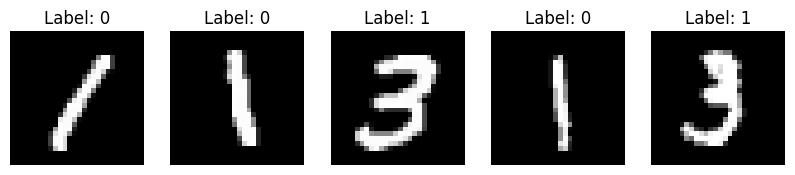

In [9]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Define transformations for the dataset
transform = transforms.Compose([transforms.ToTensor()])

# Load the MNIST dataset
mnist_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)

# Modify the data filtering to remap labels
filtered_data = [(image, 0 if label == 1 else 1) for image, label in mnist_dataset if label in [1, 3]]

# Limit the size of the dataset for computational efficiency (e.g., 1000 samples)
subset_size = 1000
custom_dataset = filtered_data[:subset_size]

# Extract images and labels for plotting
images, labels = zip(*custom_dataset)

# Plot a few examples from the customized dataset
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i, ax in enumerate(axes):
    ax.imshow(images[i].squeeze(), cmap='gray')
    ax.set_title(f'Label: {labels[i]}')
    ax.axis('off')
plt.show()

### (b) Code Below 

In [10]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Prepare the data loader
data_loader = DataLoader(custom_dataset, batch_size=32, shuffle=True)

# Define a simple CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.fc1 = nn.Linear(32 * 7 * 7, 64)
        self.fc2 = nn.Linear(64, 2)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(2, 2)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.maxpool(x)
        x = self.relu(self.conv2(x))
        x = self.maxpool(x)
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the model, loss function, and optimizer
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop (1 epoch)
model.train()
for images, labels in data_loader:
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

print("CNN model trained for 1 epoch.")

CNN model trained for 1 epoch.


### (c) Code for ResNet Model trained below 

In [11]:
from torchvision import models

# Load a pre-trained ResNet model and adjust for MNIST
resnet = models.resnet18(pretrained=True)
resnet.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
resnet.fc = nn.Linear(resnet.fc.in_features, 2)

# Define the optimizer
optimizer = optim.Adam(resnet.parameters(), lr=0.001)

# Training loop (1 epoch)
resnet.train()
for images, labels in data_loader:
    optimizer.zero_grad()
    outputs = resnet(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

print("ResNet model trained for 1 epoch.")

/Users/akhileshnevatia/ML_574/myenv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/akhileshnevatia/ML_574/myenv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/akhileshnevatia/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100.0%


ResNet model trained for 1 epoch.


### (d) Code for Feedforward NN model with D below

In [13]:
# Define a simple Feedforward Neural Network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 2)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the images
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model, loss function, and optimizer
nn_model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(nn_model.parameters(), lr=0.001)

# Training loop (1 epoch)
nn_model.train()
for images, labels in data_loader:
    optimizer.zero_grad()
    outputs = nn_model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

print("Feedforward NN model trained for 1 epoch.")

Feedforward NN model trained for 1 epoch.


## Question 2

### (a) Number of Parameters
- **Weights per Kernel**: Each kernel has dimensions 5x5 and spans 3 input channels (for RGB). Thus, the number of weights per kernel is:
  - 5 * 5 * 3 = 75
- **Bias per Kernel**: 1 bias term for each kernel
- **Total Parameters per Kernel**: 75 (weights) + 1 (bias) = 76
- **Number of Kernels**: 10
- **Total Parameters in the Layer**: 76 * 10 = 760

**Answer**: The convolutional layer has **760 parameters** in total.

---

### (b) Minimum Image Size for Compatibility
- **Given**:
  - Kernel Size: 5
  - Stride: 1
  - Padding: 0
- **Output Size Formula**: (Input Size - Kernel Size) / Stride + 1
- **Setting Output Size to 1**:
  - (Input Size - 5) / 1 + 1 = 1
  - Simplifying: Input Size - 5 = 0, so Input Size = 5

**Answer**: The minimum image size is **5x5x3** (height 5, width 5, and 3 channels).

# Question 3: 

Key Problem Addressed by ResNet

- **Problem Addressed**: ResNet (Residual Networks) aims to solve the problem of the **vanishing/exploding gradient** in very deep neural networks, which makes training difficult.
- **Explanation**:
  - As neural networks become deeper, gradients can become extremely small (vanishing) or very large (exploding) during backpropagation.
  - This issue leads to poor convergence or models that fail to learn effectively.

- **Key Concept**: **Residual Learning**
  - ResNet introduces **residual connections** (or skip connections), which allow the model to learn identity mappings more easily by bypassing one or more layers.
  - These skip connections make it easier for the network to learn transformations and ensure better gradient flow.

- **Impact**:
  - Enables the training of much deeper networks (e.g., 50, 101, or even more layers) without suffering from severe degradation in performance.
  - Improves accuracy and stability in deep architectures.

**Summary**: ResNet addresses the challenge of training deep networks by using residual connections to improve gradient flow and convergence.

# Question 4: 

Key Problem Addressed by Dropout

- **Problem Addressed**: Dropout aims to tackle the problem of **overfitting** in deep neural networks.
- **Explanation**:
  - Overfitting occurs when a model learns to perform well on the training data but fails to generalize to unseen data.
  - This happens because the model becomes too complex, capturing noise and unnecessary details from the training set.

- **Key Concept**: **Regularization Technique**
  - Dropout is a regularization method that randomly "drops out" (sets to zero) a fraction of neurons during each training iteration.
  - By doing this, the network becomes less dependent on specific neurons, forcing it to learn more robust and generalizable features.

- **Impact**:
  - Reduces the likelihood of overfitting and improves the network's ability to generalize to new data.
  - Acts as a form of ensemble learning, as different subsets of the network are trained in each iteration.

**Summary**: Dropout helps prevent overfitting by randomly dropping neurons during training, which promotes the learning of more generalized features.